# crawling urls of articles

In [ ]:
import requests
from bs4 import BeautifulSoup

# 기사 URL을 저장할 리스트
article_urls = []

# 페이지 수
num_pages = 30

# 각 페이지를 순회하면서 기사 URL을 추출
for page in range(1, num_pages+1):
    url = f"https://m.tenbizt.com/news/issue/page/{page}/"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    articles = soup.find_all('li')

    # 기사 URL 추출
    for article in articles:
        link = article.find('a')
        if link:
            article_url = link.get('href')
            article_urls.append(article_url)

# 추출된 기사 URL 출력 (660개)
urls = [item for item in article_urls if 'https://m.tenbizt.com/issue/article' in item]

# extract anchor text (urls)

In [ ]:
from html.parser import HTMLParser
from urllib.request import urlopen
from urllib.parse import urljoin

class MyHTMLParser(HTMLParser):
    def __init__(self):
        super().__init__()
        self.links = []

    def handle_starttag(self, tag, attrs):
        if tag == 'a':
            for (name, value) in attrs:
                if name == 'href':
                    self.links.append(value)
                    break

df = pd.DataFrame(columns=['idx', 'URL', 'links'])

for i, url in enumerate(urls):
    parser = MyHTMLParser()
    response = urlopen(url)
    html_content = response.read().decode('utf-8')
    parser.feed(html_content)
    absolutes = []
    # 상대 URL을 절대 URL로 변환하고, all_absolutes 리스트에 추가
    for link in parser.links:
        absolutes.append(urljoin(url, link))
    df.loc[len(df)] = [None, url, absolutes]

# 결과 출력
df.head()

In [ ]:
df.to_csv('df.csv')

In [4]:
import pandas as pd
df = pd.read_csv('df.csv')

In [5]:
df.head()

,Unnamed: 0,idx,URL,links,link_idx
0,0,1,https://m.tenbizt.com/issue/article/114092/,['https://m.tenbizt.com/issue/article/114092/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."
1,1,2,https://m.tenbizt.com/issue/article/113685/,['https://m.tenbizt.com/issue/article/113685/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."
2,2,3,https://m.tenbizt.com/issue/article/113999/,['https://m.tenbizt.com/issue/article/113999/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."
3,3,4,https://m.tenbizt.com/issue/article/114021/,['https://m.tenbizt.com/issue/article/114021/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."
4,4,5,https://m.tenbizt.com/issue/article/114006/,['https://m.tenbizt.com/issue/article/114006/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."


# remove a col that we don't need

In [6]:
df = df.drop(df.columns[0], axis=1)

In [8]:
df

,idx,URL,links,link_idx
0,1,https://m.tenbizt.com/issue/article/114092/,['https://m.tenbizt.com/issue/article/114092/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."
1,2,https://m.tenbizt.com/issue/article/113685/,['https://m.tenbizt.com/issue/article/113685/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."
2,3,https://m.tenbizt.com/issue/article/113999/,['https://m.tenbizt.com/issue/article/113999/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."
3,4,https://m.tenbizt.com/issue/article/114021/,['https://m.tenbizt.com/issue/article/114021/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."
4,5,https://m.tenbizt.com/issue/article/114006/,['https://m.tenbizt.com/issue/article/114006/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."
...,...,...,...,...
655,656,https://m.tenbizt.com/issue/article/99829/,['https://m.tenbizt.com/issue/article/99829/#g...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 21, 22, 43, 44..."
656,657,https://m.tenbizt.com/issue/article/100233/,['https://m.tenbizt.com/issue/article/100233/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 21, 22, 43, 44..."
657,658,https://m.tenbizt.com/issue/article/99682/,['https://m.tenbizt.com/issue/article/99682/#g...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 21, 22, 43, 44..."
658,659,https://m.tenbizt.com/issue/article/112322/?ut...,['https://m.tenbizt.com/issue/article/112322/?...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 21, 22, 43, 44..."


In [9]:
df.to_csv('df_links.csv', index=False) # 이러면 빈칼럼에 인덱스 저장 안되지

# (put values in the empty col)

In [10]:
df['idx'] = range(1, 661)

In [11]:
df

,idx,URL,links,link_idx
0,1,https://m.tenbizt.com/issue/article/114092/,['https://m.tenbizt.com/issue/article/114092/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."
1,2,https://m.tenbizt.com/issue/article/113685/,['https://m.tenbizt.com/issue/article/113685/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."
2,3,https://m.tenbizt.com/issue/article/113999/,['https://m.tenbizt.com/issue/article/113999/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."
3,4,https://m.tenbizt.com/issue/article/114021/,['https://m.tenbizt.com/issue/article/114021/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."
4,5,https://m.tenbizt.com/issue/article/114006/,['https://m.tenbizt.com/issue/article/114006/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."
...,...,...,...,...
655,656,https://m.tenbizt.com/issue/article/99829/,['https://m.tenbizt.com/issue/article/99829/#g...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 21, 22, 43, 44..."
656,657,https://m.tenbizt.com/issue/article/100233/,['https://m.tenbizt.com/issue/article/100233/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 21, 22, 43, 44..."
657,658,https://m.tenbizt.com/issue/article/99682/,['https://m.tenbizt.com/issue/article/99682/#g...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 21, 22, 43, 44..."
658,659,https://m.tenbizt.com/issue/article/112322/?ut...,['https://m.tenbizt.com/issue/article/112322/?...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 21, 22, 43, 44..."


In [12]:
df.head(1)

,idx,URL,links,link_idx
0,1,https://m.tenbizt.com/issue/article/114092/,['https://m.tenbizt.com/issue/article/114092/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."


# replace real url links to idices

In [13]:
# 새 칼럼 준비
df['link_idx'] = None
df

,idx,URL,links,link_idx
0,1,https://m.tenbizt.com/issue/article/114092/,['https://m.tenbizt.com/issue/article/114092/#...,None
1,2,https://m.tenbizt.com/issue/article/113685/,['https://m.tenbizt.com/issue/article/113685/#...,None
2,3,https://m.tenbizt.com/issue/article/113999/,['https://m.tenbizt.com/issue/article/113999/#...,None
3,4,https://m.tenbizt.com/issue/article/114021/,['https://m.tenbizt.com/issue/article/114021/#...,None
4,5,https://m.tenbizt.com/issue/article/114006/,['https://m.tenbizt.com/issue/article/114006/#...,None
...,...,...,...,...
655,656,https://m.tenbizt.com/issue/article/99829/,['https://m.tenbizt.com/issue/article/99829/#g...,None
656,657,https://m.tenbizt.com/issue/article/100233/,['https://m.tenbizt.com/issue/article/100233/#...,None
657,658,https://m.tenbizt.com/issue/article/99682/,['https://m.tenbizt.com/issue/article/99682/#g...,None
658,659,https://m.tenbizt.com/issue/article/112322/?ut...,['https://m.tenbizt.com/issue/article/112322/?...,None


### test (부분문자열로 검사)

In [14]:
test = pd.DataFrame({
    'idx' : range(3),
    'URL' : ['u','t','e'],
    'links' : [['j/t/d','e'],['d'],['u']]
})
test

,idx,URL,links
0,0,u,"[j/t/d, e]"
1,1,t,[d]
2,2,e,[u]


In [15]:
for idx, links in zip(test['idx'], test['links']):
    for link in links:
        # URL 리스트를 순회하며 부분 문자열이 포함되어 있는지 검사
        if any(url in link for url in test['URL']):
            print(idx, link)

0 j/t/d
0 e
2 u


In [16]:
for idx, links in zip(df[:1]['idx'], df[:1]['links']):
    for link in links:
        print(link,'\n')

[ 

' 

h 

t 

t 

p 

s 

: 

/ 

/ 

m 

. 

t 

e 

n 

b 

i 

z 

t 

. 

c 

o 

m 

/ 

i 

s 

s 

u 

e 

/ 

a 

r 

t 

i 

c 

l 

e 

/ 

1 

1 

4 

0 

9 

2 

/ 

# 

g 

n 

b 

' 

, 

  

' 

h 

t 

t 

p 

s 

: 

/ 

/ 

m 

. 

t 

e 

n 

b 

i 

z 

t 

. 

c 

o 

m 

/ 

i 

s 

s 

u 

e 

/ 

a 

r 

t 

i 

c 

l 

e 

/ 

1 

1 

4 

0 

9 

2 

/ 

# 

m 

a 

i 

n 

' 

, 

  

' 

h 

t 

t 

p 

s 

: 

/ 

/ 

m 

. 

t 

e 

n 

b 

i 

z 

t 

. 

c 

o 

m 

/ 

i 

s 

s 

u 

e 

/ 

a 

r 

t 

i 

c 

l 

e 

/ 

1 

1 

4 

0 

9 

2 

/ 

# 

b 

n 

b 

' 

, 

  

' 

h 

t 

t 

p 

s 

: 

/ 

/ 

m 

. 

t 

e 

n 

b 

i 

z 

t 

. 

c 

o 

m 

' 

, 

  

' 

h 

t 

t 

p 

s 

: 

/ 

/ 

m 

. 

t 

e 

n 

b 

i 

z 

t 

. 

c 

o 

m 

/ 

n 

e 

w 

s 

/ 

i 

s 

s 

u 

e 

/ 

' 

, 

  

' 

h 

t 

t 

p 

s 

: 

/ 

/ 

m 

. 

t 

e 

n 

b 

i 

z 

t 

. 

c 

o 

m 

/ 

n 

e 

w 

s 

/ 

c 

u 

l 

t 

u 



### link 문자열 하나하나 비교하는게 아니라 뭉텅이로 비교해야함

In [17]:
print(len(df.loc[0, 'links']))

5460


In [18]:
len(df['links'][0])

5460

In [19]:
for idx, links in zip(df[:5]['idx'], df[:5]['links']):
    sum=0
    print(idx)
    for url_idx, url in zip(df['idx'], df['URL']):
        if url in links:
            #print(url,'\n')
            sum += 1
    print(sum)

1
78
2
78
3
78
4
79
5
75


In [20]:
df['link_idx'] = [[] for _ in range(len(df))]
df

,idx,URL,links,link_idx
0,1,https://m.tenbizt.com/issue/article/114092/,['https://m.tenbizt.com/issue/article/114092/#...,[]
1,2,https://m.tenbizt.com/issue/article/113685/,['https://m.tenbizt.com/issue/article/113685/#...,[]
2,3,https://m.tenbizt.com/issue/article/113999/,['https://m.tenbizt.com/issue/article/113999/#...,[]
3,4,https://m.tenbizt.com/issue/article/114021/,['https://m.tenbizt.com/issue/article/114021/#...,[]
4,5,https://m.tenbizt.com/issue/article/114006/,['https://m.tenbizt.com/issue/article/114006/#...,[]
...,...,...,...,...
655,656,https://m.tenbizt.com/issue/article/99829/,['https://m.tenbizt.com/issue/article/99829/#g...,[]
656,657,https://m.tenbizt.com/issue/article/100233/,['https://m.tenbizt.com/issue/article/100233/#...,[]
657,658,https://m.tenbizt.com/issue/article/99682/,['https://m.tenbizt.com/issue/article/99682/#g...,[]
658,659,https://m.tenbizt.com/issue/article/112322/?ut...,['https://m.tenbizt.com/issue/article/112322/?...,[]


In [21]:
df['link_idx'] = [[] for _ in range(len(df))]

for row_idx, (idx, links) in enumerate(zip(df['idx'], df['links'])):
    cnt = 0
    for url_idx, url in zip(df['idx'], df['URL']):
        if (url in links): 
            #df.loc[df['idx'] == idx, 'link_idx'] += url_idx # 21643..이런식으로 저장됨
            df.at[row_idx, 'link_idx'].append(url_idx) # 'link_idx' 칼럼이 리스트일 때 가능
            cnt += 1
    #print(idx, cnt)

In [22]:
df.head(3)

,idx,URL,links,link_idx
0,1,https://m.tenbizt.com/issue/article/114092/,['https://m.tenbizt.com/issue/article/114092/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."
1,2,https://m.tenbizt.com/issue/article/113685/,['https://m.tenbizt.com/issue/article/113685/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."
2,3,https://m.tenbizt.com/issue/article/113999/,['https://m.tenbizt.com/issue/article/113999/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."


In [23]:
len(df['link_idx'][0])

78

# make in-link and out-link lists

In [24]:
import pandas as pd
import numpy as np

# 노드 목록 생성
nodes = df['idx'].tolist()

# 인바운드 링크와 아웃바운드 링크를 저장할 딕셔너리 초기화
inlinks = {node: set() for node in nodes} # 고유 'idx'
outlinks = {node: set() for node in nodes}

# 인바운드 링크와 아웃바운드 링크 채우기
for idx, links in zip(df['idx'], df['link_idx']):
    outlinks[idx].update(links) 
    for link in links:
        inlinks[link].add(idx)

In [25]:
# 78개여야함
len(outlinks[1])

78

In [38]:
# 링크 행렬 생성
link_matrix = pd.DataFrame(0, index=nodes, columns=nodes) # 모든 값 0으로 초기화

for url in nodes:
    for link in outlinks[url]:
        link_matrix.loc[url, link] = 1

In [39]:
link_matrix

,1,2,3,4,5,6,7,8,9,10,...,651,652,653,654,655,656,657,658,659,660
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
5,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,1,0,0,1,1
657,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,1,1
658,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,1,1
659,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1


In [40]:
new = df

In [41]:
new

,idx,URL,links,link_idx
0,1,https://m.tenbizt.com/issue/article/114092/,['https://m.tenbizt.com/issue/article/114092/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."
1,2,https://m.tenbizt.com/issue/article/113685/,['https://m.tenbizt.com/issue/article/113685/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."
2,3,https://m.tenbizt.com/issue/article/113999/,['https://m.tenbizt.com/issue/article/113999/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."
3,4,https://m.tenbizt.com/issue/article/114021/,['https://m.tenbizt.com/issue/article/114021/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."
4,5,https://m.tenbizt.com/issue/article/114006/,['https://m.tenbizt.com/issue/article/114006/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."
...,...,...,...,...
655,656,https://m.tenbizt.com/issue/article/99829/,['https://m.tenbizt.com/issue/article/99829/#g...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 21, 22, 43, 44..."
656,657,https://m.tenbizt.com/issue/article/100233/,['https://m.tenbizt.com/issue/article/100233/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 21, 22, 43, 44..."
657,658,https://m.tenbizt.com/issue/article/99682/,['https://m.tenbizt.com/issue/article/99682/#g...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 21, 22, 43, 44..."
658,659,https://m.tenbizt.com/issue/article/112322/?ut...,['https://m.tenbizt.com/issue/article/112322/?...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 21, 22, 43, 44..."


`networkx`의 `pagerank` 함수는 웹 페이지의 중요도를 순위 매기는데 사용되는 PageRank 알고리즘을 구현합니다. 이 알고리즘은 웹 페이지 간의 링크 구조를 바탕으로 각 페이지의 중요도를 추정합니다. 여기서 언급한 "transition matrix with teleporting"은 PageRank 알고리즘의 핵심 개념 중 하나입니다.

### PageRank와 Transition Matrix

PageRank 알고리즘에서는 웹을 하나의 큰 그래프로 모델링합니다. 각 웹 페이지는 그래프의 노드가 되고, 한 페이지에서 다른 페이지로의 링크는 노드 간의 방향성 있는 엣지가 됩니다. Transition matrix는 이 그래프의 이동 확률을 나타내는데, matrix의 각 항목은 특정 페이지에서 다른 페이지로 이동할 확률을 나타냅니다.

### Teleporting

웹 페이지들 사이에 링크가 없거나, 링크가 있더라도 어떤 페이지들은 다른 페이지로 이동할 수 없는 "dead ends" 상태가 될 수 있습니다. 이를 해결하기 위해 PageRank 알고리즘은 "teleporting"을 도입합니다. 사용자가 현재 페이지에서 다른 페이지로 링크를 따라 이동하는 대신, 전체 웹 중 임의의 페이지로 "teleport"할 확률을 도입하는 것입니다. 이는 알고리즘의 수렴을 도와주고, 모든 페이지가 어느 정도의 중요도를 가지게 합니다.

### networkx의 pagerank

`networkx`의 `pagerank` 함수는 이러한 PageRank 알고리즘을 구현하고 있으며, `alpha` 매개변수를 통해 teleporting의 확률을 조정할 수 있습니다. 기본값은 `alpha=0.85`이며, 이는 사용자가 현재 페이지에서 링크를 따라 다른 페이지로 이동할 확률이 85%이고, 나머지 15%는 임의의 페이지로 teleport 할 확률을 의미합니다.

```python
result = nx.pagerank(Graph, 

pagerank(G, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)
tps://agent.wrtn.ai/5xb91l

In [42]:
import networkx as nx
Graph = nx.DiGraph()
for url, links in zip(new['idx'], new['link_idx']):
    for link in links:
        Graph.add_edge(url, link)
result = nx.pagerank(Graph, alpha=0.85, max_iter=1000, tol= 0.00001) # 내가 만든 파일이랑 조건을 맞추기 위함

In [43]:
result

{1: 0.011338544805189504,
 2: 0.011338544805189504,
 3: 0.011338544805189504,
 4: 0.011338544805189504,
 5: 0.011338544805189504,
 6: 0.011338544805189504,
 7: 0.011338544805189504,
 8: 0.011338544805189504,
 9: 0.011338544805189504,
 10: 0.011338544805189504,
 11: 0.001478067715891446,
 21: 0.011352834413581191,
 22: 0.011352834413581191,
 43: 0.011352834413581191,
 44: 0.011352834413581191,
 65: 0.011352834413581191,
 66: 0.011352834413581191,
 75: 0.0003550247773290218,
 87: 0.011352834413581191,
 88: 0.011352834413581191,
 93: 0.011352834413581191,
 97: 0.011352834413581191,
 109: 0.011352834413581191,
 110: 0.011352834413581191,
 131: 0.011352834413581191,
 132: 0.011352834413581191,
 153: 0.011352834413581191,
 154: 0.011352834413581191,
 175: 0.011352834413581191,
 176: 0.011352834413581191,
 185: 0.004357514270563131,
 197: 0.011352834413581191,
 198: 0.011352834413581191,
 208: 0.00036045547469301317,
 217: 0.0003548596481159777,
 219: 0.011352834413581191,
 220: 0.01135283441

In [44]:
len(result)

660

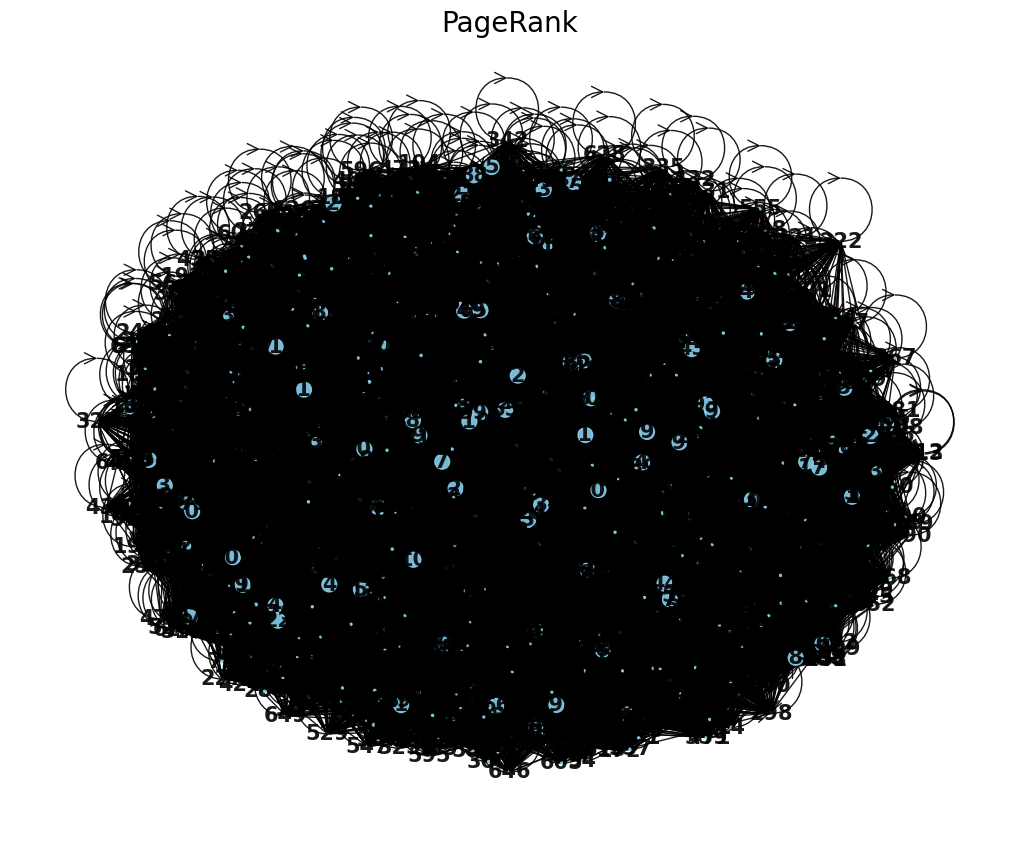

In [45]:
import matplotlib.pyplot as plt

node_size = [result[node] * 10000 for node in Graph.nodes()]

# 그래프 시각화
plt.figure(figsize=(10, 8))
nx.draw(Graph, with_labels=True, node_size=node_size, 
        arrowstyle='->', arrowsize=20, 
        node_color='skyblue', font_size=15, 
        font_weight='bold', alpha=0.9)
plt.title('PageRank', size=20)
plt.show()

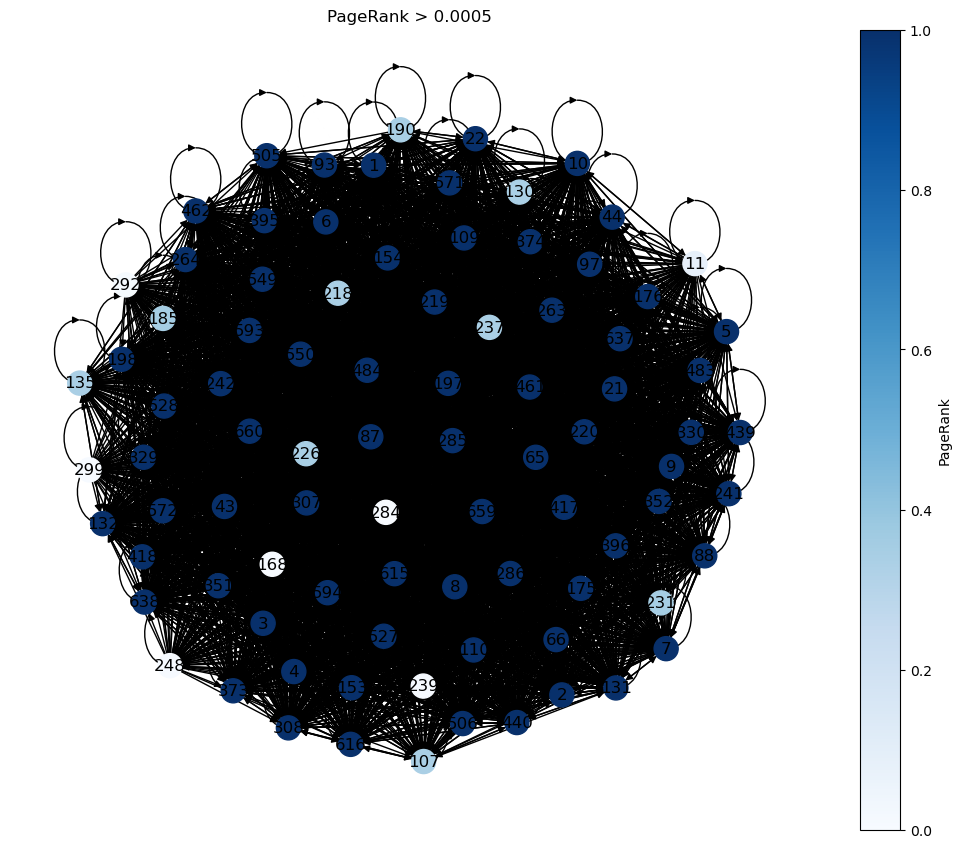

In [46]:
import networkx as nx
import matplotlib.pyplot as plt

# PageRank 점수가 0.005보다 큰 노드를 포함하는 부분 그래프 생성
sub_nodes = [node for node, score in result.items() if score > 0.0005]
H = Graph.subgraph(sub_nodes)

# PageRank 점수에 따라 색상 지정
scores = [result[node] for node in H]
colors = [score / max(scores) for score in scores]  # 점수를 색상 값으로 변환

# 그래프 플로팅
plt.figure(figsize=(10, 8))
nx.draw(H, with_labels=True, node_color=colors, cmap=plt.cm.Blues, node_size=300)
plt.title("PageRank > 0.0005")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Blues), label='PageRank')
plt.show()

# 너무 많은 것 같아서 뉴스 기사 10개로만 다시해봄 (그래프 더 잘 보이도록)